In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate
import pandas as pd

## 1.1 Series de Fourier

### 1.  

Dado que $f$ es periódica, su derivada también es periódica, así, ambas funciones comparten el mismo periodo y frecuencia. Los coeficientes de Fourier de $f'(t)$ se pueden calcular usando la definición (los coeficientes de $f'(t)$ se denotan por el símnbolo $\tilde{}$ sobre ellos):

$$ \tilde{a_0} = \int_{-T/2}^{T/2}f'(t)dt = f(T/2) - f(-T/2) = 0 $$

$$\tilde{a_n} = \int_{-T/2}^{T/2}f'(t) \cos(n\omega t) dt = \left[\cos(n\omega t)f(t)\right]\bigg|_{-T/2}^{T/2} + n\omega\int_{-T/2}^{T/2} f(t)\sin(n\omega t) = n\omega b_n$$

$$\tilde{b_n} = \int_{-T/2}^{T/2}f'(t) \sin(n\omega t) dt = \left[\sin(n\omega t)f(t)\right]\bigg|_{-T/2}^{T/2} - n\omega\int_{-T/2}^{T/2} f(t)\cos(n\omega t) = - n\omega a_n.$$

Así, la serie de Fourier de $f'(t)$ corresponde a

$$ \sum_{n = 1}^{\infty} (n\omega b_n)\cos(n\omega t) + (-n\omega a_n) \sin(n \omega t).$$

Esto es equivalente a derivar cada término de la serie de Fourier de $f(t)$, mostrando lo que se deseaba. Teniendo la hipótesis de que la serie de Fourier de $f(t)$ converge uniformemente, se llega a que $f'(t)$ es igual a su serie de Fourier, obteniendo lo que se deseaba.

### 2.

Sea $f_n(t) := \frac{a_0}{2} + \sum_{j = 1}^{n} a_j \cos(j\omega t) + b_j\sin(j \omega t)$, para todo $n \in \mathbb{N_0}$. Suponga que la suceción de funciones $f_n$ converge uniformemente a $f$, esto es equivalente a decir que $||f_n - f||_\infty $ converge a 0, cuando $n \to \infty$. $||f_n - f||_\infty$, corresponde a la norma del supremo, es decir, $||f_n - f||_\infty$ es el supremo del conjunto $\left\{|f_n(t) - f(t)| : t \text{ pertenece al dominio de} f \text{ y de } f_n \right\}$. Note que $|f_n -f||_\infty \geq |f_n(t) - f(t)|, $ para todo $t$. Así, se puede realizar la siguiente comparación:

$$\left| \int_{t_1}^{t_2} f_n(t)dt - \int_{t_1}^{t_2}f(t)dt \right| \leq  \int_{t_1}^{t_2} \left|f_n(t) - f(t)\right|dt \leq \int_{t_1}^{t_2} \left||f_n(t) - f(t)\right||_\infty dt = (t_2 - t_1)\left||f_n(t) - f(t)\right||_\infty.$$

Esto último se sigue del hecho que $\left||f_n(t) - f(t)\right||_\infty \in \mathbb{R}$, en nuestro caso. Así, cuando dado que $||f_n - f||_\infty$ tiende a 0, cuando $n$ tiende a $\infty$, se sigue que: 

$$\int_{t_1}^{t_2} f(t)dt = \lim_{n \to \infty} \int_{t_1}^{t_2}f_n(t)dt = \int_{t_1}^{t_2} \frac{a_0}{2} dt + \sum_{n = 1}^{\infty} \int_{t_1}^{t_2}a_n\cos(n\omega t)dt + \int_{t_1}^{t_2} b_n\sin(n \omega t)dt,$$

obteniendo el resultado del enunciado.


## 1.2 Presentación de funciones

### 1. 

Sea $f(t) = t$ en el intervalo $- \pi <  t < \pi$ y $f(t + 2\pi) = f(t)$. Esta función tiene como periodo $T = 2\pi$, por lo tanto, la frecuencia corresponde a $\omega_0 = \frac{2\pi}{T} = 1$.Teniendo en cuenta lo visto en clase, los coeficientes de la serie de Fourier de esta función son:


$$a_0 = \frac{1}{\pi}\int_{-\pi}^{\pi}t dt = 0 $$

$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi}t \cos(nt) dt = 0$$

$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi}t \sin(nt) dt = (-1)^{n+1}\frac{2}{n} .$$

Teniendo en cuenta que $(-1)^{n-1} = (-1)^{n+1}$, la serie de Fourier de $f(t)$ corresponde a:

$$  \sum_{i = 1}^{\infty} (-1)^{n-1}\frac{2}{n} \sin(nt). $$

A continuación, se muestra una animación de los primeros 50 armónicos de la anterior serie de fourier


<IPython.core.display.Javascript object>


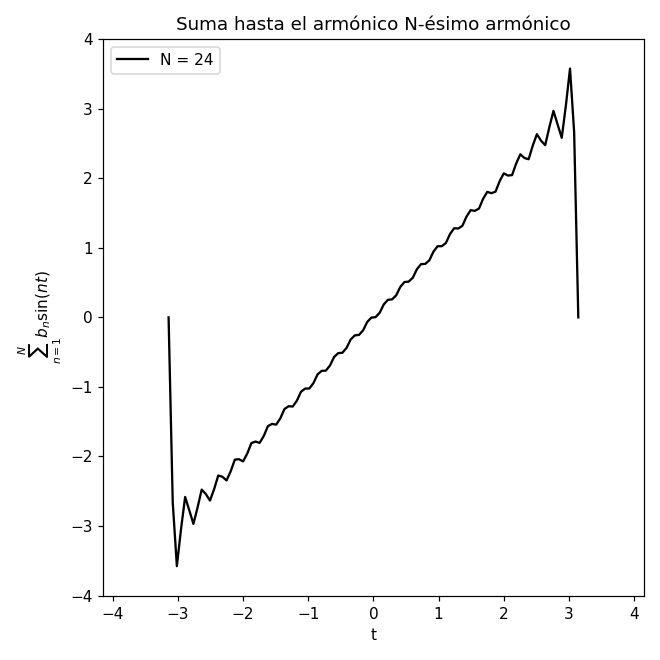

In [2]:

plt.close()
def f(x,n):
    
    f = 2. * (-1) ** (n-1) / n * np.sin( n*x )
    
    return f

#condiciones iniciales
L = 2*np.pi
t = np.linspace(-np.pi,np.pi,100)
n = 1
nt = 51
F = 0

fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

while n < nt:
    plt.legend('',frameon=False)
    F += f(t,n)
    armonico = plt.plot(t,F,c='k', label="N = {}".format(n))
    plt.legend(armonico, ['N = {}'.format(n)])
    plt.title("Suma hasta el armónico N-ésimo armónico".format(n))
    plt.xlabel("t")
    plt.ylabel("$\sum_{n = 1}^{N} b_n \sin(nt) $")
    plt.xlim(-np.pi-1, np.pi+1)
    camera.snap()
    n += 1 
plt.tight_layout()
animation = camera.animate()




## 1.3 Función $\zeta(s)$ de Riemann

### 1. 

Sea $f(t) = t^2$ en el intervalo $- \pi \ \leq t \leq \pi$ y $f(t + 2\pi) = f(t)$. Esta función tiene como periodo $T = 2\pi$, por lo tanto, la frecuencia corresponde a $\omega_0 = \frac{2\pi}{T} = 1$.Teniendo en cuenta lo visto en clase, los coeficientes de la serie de Fourier de esta función son:


$$a_0 = \frac{1}{\pi}\int_{-\pi}^{\pi}t^2 dt = \frac{2}{3}\pi^2 $$

$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi}t^2 \cos(nt) dt = \frac{2}{\pi n^3}\left[({\pi}^2n^2-2)\sin\left({\pi}n\right)+2{\pi}n\cos({\pi}n)\right] = (-1)^n\frac{4}{n^2} $$

$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi}t^2 \sin(nt) dt = 0 .$$

Esto último se sigue del hecho de que la función, $g(t): = t^2\sin(nt) $ $= -(-t)^2 \sin(-nt) $ $= -g(-t)$. Es decir, la función del integrando de los $b_n$ es impar, por lo tanto, la integral es 0. Así, la serie de Fourier de $f(t)$ corresponde a:

$$ \frac{\pi^2}{3} + \sum_{i = 1}^{\infty} (-1)^n\frac{4}{n^2} \cos(nt). $$

Dado que $f(t)$ es continua para todo $t \in \mathbb{R} $, se tendrá que $f(t)$ es igual a su serie de Fourier.

### 2.

Teniendo en cuenta lo demostrado en el inciso **1.1**, se tiene que la serie de Fourier se puede integrar, obteniendo lo siguiente:

$$\int_{0}^{t} f(x) dx = \int_{0}^{t} \frac{\pi^2}{3} dx + \sum_{i = 1}^{\infty} \int_{0}^{t}(-1)^n\frac{4}{n^2} \cos(nx)dx. $$

Esta igualdad es equivalente a:

$$ \frac{t^3}{3} = \frac{\pi^2}{3}t + \sum_{i = 1}^{\infty} (-1)^n\frac{4}{n^3} \sin(nt).$$

Así, tomando $h(t):= \frac{t}{12}(t^2 - \pi^2)$ y teniendo en cuenta la relación anterior, se sigue que:

$$h(t) = \sum_{n = 1}^{\infty} (-1)^n \frac{\sin(nt)}{n^3}.$$


Aplicando la identidad de Parseval a $h(t)$, se obtiene que

$$ \frac{1}{2\pi}\int_{-\pi}^{\pi} \frac{t^2}{12^2}(t^2 - \pi^2)^2 dt = \frac{1}{2}  (-1)^{2n} \frac{1}{n^6} = \frac{\zeta (6)}{2}. $$

Reorganizando términos, se llega a:

$$\zeta{(6)} = \frac{1}{\pi}\int_{-\pi}^{\pi} \frac{t^2}{12^2}(t^2 - \pi^2)^2 dt = \frac{\pi^6}{945}.$$

<IPython.core.display.Javascript object>


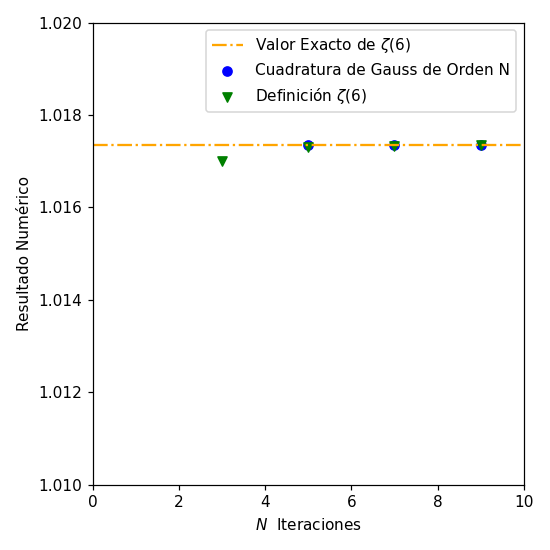

Las aproximaciones numéricas de zeta(6) = 1.017343 por los diferentes métodos usados: cuadratura de Gauss (cg)/definición (df): 
Aproximación numérica con N = 1; cg = 1.000000 ;  df = 0.000000
Aproximación numérica con N = 3; cg = 1.016997 ;  df = 0.712140
Aproximación numérica con N = 5; cg = 1.017305 ;  df = 1.017343
Aproximación numérica con N = 7; cg = 1.017335 ;  df = 1.017343
Aproximación numérica con N = 9; cg = 1.017341 ;  df = 1.017343


In [3]:
"""
A continuación, en esta celda se realizará una comparación entre
el método de cuadratura de Gauss de orden N y la definición de la 
función zeta de riemann acotando la suma hasta el N-ésimo término. 
Estas aproximaciones se harán para los valores de N = [1, 3, 5, 7, 9].
"""


def termino_n_def(n):
    defi = 0
    if(n > 0):
        defi = 1/(n**6)
    return defi    
    
def aprxZeta(N):
    a = 0
    #Este método permite calcular por cuadratura de gauss para un orden fijo.
    b, xn = integrate.fixed_quad(lambda t: 1/np.pi*(t/12*(t**2 - np.pi**2))**2, -np.pi, np.pi, n = N) 
    for n in range(N):
        a += termino_n_def(n+1)   
    return a, b
    
    
NN = [1,3,5,7,9]
valE = np.pi**6/945
fig = plt.figure(figsize=(5,5))


plt.ylim(1.01,1.02)
plt.xlim(0,10)
plt.xlabel("$N$  Iteraciones")
plt.ylabel("Resultado Numérico")
aa, bb = [], []
print("Las aproximaciones numéricas de zeta(6) = {:4f} por los diferentes métodos usados: cuadratura de Gauss (cg)/definición (df): ".format(valE))
for n in NN:
    a,b = aprxZeta(n)
    aa += [a]
    bb += [b]
    print("Aproximación numérica con N = {}; cg = {:.6f} ;  df = {:.6f}".format(n, a,b))
plt.axhline(y = valE, color = 'orange', linestyle = '-.', label="Valor Exacto de $\zeta(6)$")
plt.scatter(NN, bb, label = "Cuadratura de Gauss de Orden N", c = "blue")
plt.scatter(NN, aa, label = "Definición $\zeta(6)$", c = "green", marker="v")
plt.legend()
plt.tight_layout()

In [4]:
#Inciso 1.4

def f(x):
    f = np.exp( (-0.1 * x )) * np.sin(x)
    return f

def derivadateorica(x):
    f = np.exp(-0.1*x) * (np.cos(x) - 0.1 * np.sin(x))
    return f

In [5]:
#Muestreo de f

n = 100
L = 4 *np.pi
deltax = n / L
x = np.arange(-2*np.pi,2*np.pi,1/deltax)
funcion = f(x)

#Derivada Exacta

df = derivadateorica(x)

#Derivada por Derecha

dfFD = np.zeros(len(df),dtype = 'complex_')
for i in range(len(df)-1):
    dfFD[i] = (funcion[i+1]-funcion[i])/(L/n)

dfFD[-1]=dfFD[-2]

#Derivada Espectral
fhat = np.fft.fft(funcion)
k = (2*np.pi/L) * np.arange(-n/2,n/2)

kappa = np.fft.fftshift(k)
dfhat = kappa * fhat * 1j
dfFFT = np.real(np.fft.ifft(dfhat))



<IPython.core.display.Javascript object>


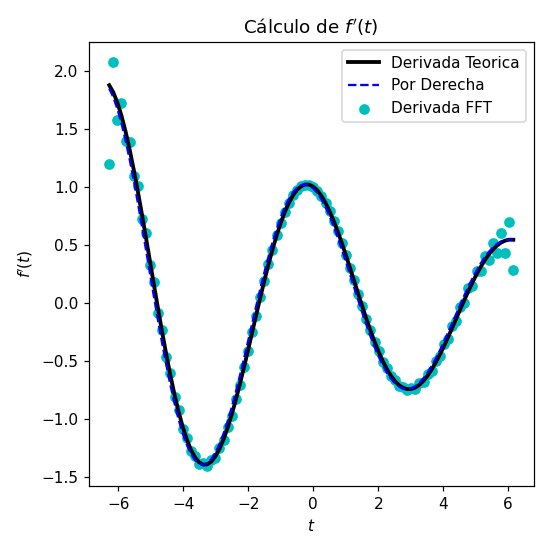

In [6]:
#Comparación Gráfica de los diferentes métodos

fig = plt.figure(figsize=(5,5))
plt.plot(x,df.real,color = 'k', label = 'Derivada Teorica', linewidth=2.5)
plt.plot(x,dfFD.real,color = 'b', label = 'Por Derecha', linewidth=1.5, ls= "--")
plt.scatter(x,dfFFT.real,color = 'c', label = 'Derivada FFT')
plt.legend()
plt.title("Cálculo de $f'(t)$")
plt.xlabel("$t$")
plt.ylabel("$f'(t)$")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


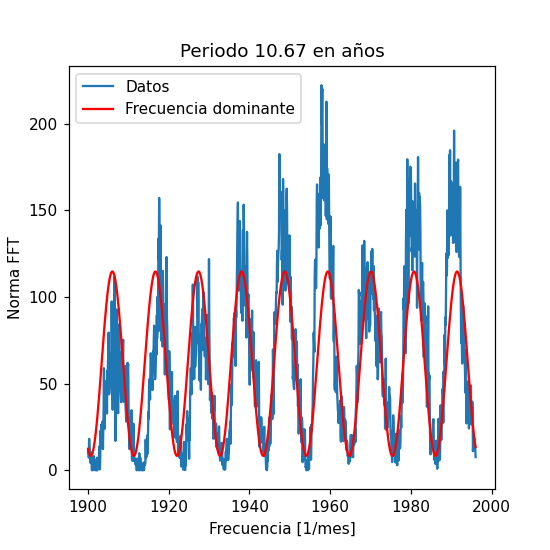

In [7]:
#### ESTE CÓDIGO SOLO SIRVE SI SE DESCARGA EL SIGUIENTE ARCHIVO QUE CONTIENE LOS DATOS!!!!!!!!!!!!!!!


df = pd.read_csv("DatosSol.dat", sep="\s+", header=None) 

Datos = df.to_numpy()

Mask = Datos[:, 0] >=1900
#Filtrado de los datos a partir de 1990
NDatos = Datos[Mask]

# Convertimos los meses en fracción de años
Ann = NDatos[:,0] 
Mont = NDatos[:,1]
Manchas = NDatos[:,3]
t = Ann + Mont/12


#Restar el promedio de los datos
MMan = np.mean(Manchas)
Manchas = Manchas - MMan
N = len(Manchas)

#Cálculo de la transformada de Fourier de los Datos
fft = np.fft.fft(Manchas)
freq = np.fft.fftfreq(N,1)


#Tomamos la frecuencia fundamental de los datos (frecuencia con mayor aporte), creamos una copia de la fft

positivo = freq > 0 
fft2 = np.copy(fft) #Si no s eusa este método se modifica el array original de fft
freq2 = np.copy(freq)
fft2[~positivo] = 0

indices = np.argmax(np.abs(fft2)) #Posición Frecuencia fundamental de las manchas.
FreqMax = freq[indices]
frecuencias_desechar = (np.abs(freq) < FreqMax) | (np.abs(freq) > FreqMax)

#Anulamos la contribución de las demás frecuencias y se realiza la transformada inversa de esta frecuencia fundamental
fft[frecuencias_desechar] = 0

Manchas_fundamental = np.real(np.fft.ifft(fft)) 

#El periodo por año corresponde a 
T = 1/FreqMax/12

plt.figure(figsize=(5,5))
plt.plot(t, Manchas + MMan, label="Datos")
plt.plot(t, Manchas_fundamental + MMan, label="Frecuencia dominante", color="red")
plt.xlabel("Frecuencia [1/mes]")
plt.ylabel("Norma FFT")
plt.title("Periodo {:.2f} en años".format(T))
plt.legend()